In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [153]:
house_price_data = pd.read_csv('Housing.csv')
house_price_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7229300521,20141013T000000,2,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,231300.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [154]:
house_price_data.drop(columns=['id', 'date', 'zipcode', 'lat', 'long','sqft_lot15', 'sqft_living15', 'grade' ], inplace=True)
 
house_price_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,231300.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0


In [155]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  price          21613 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


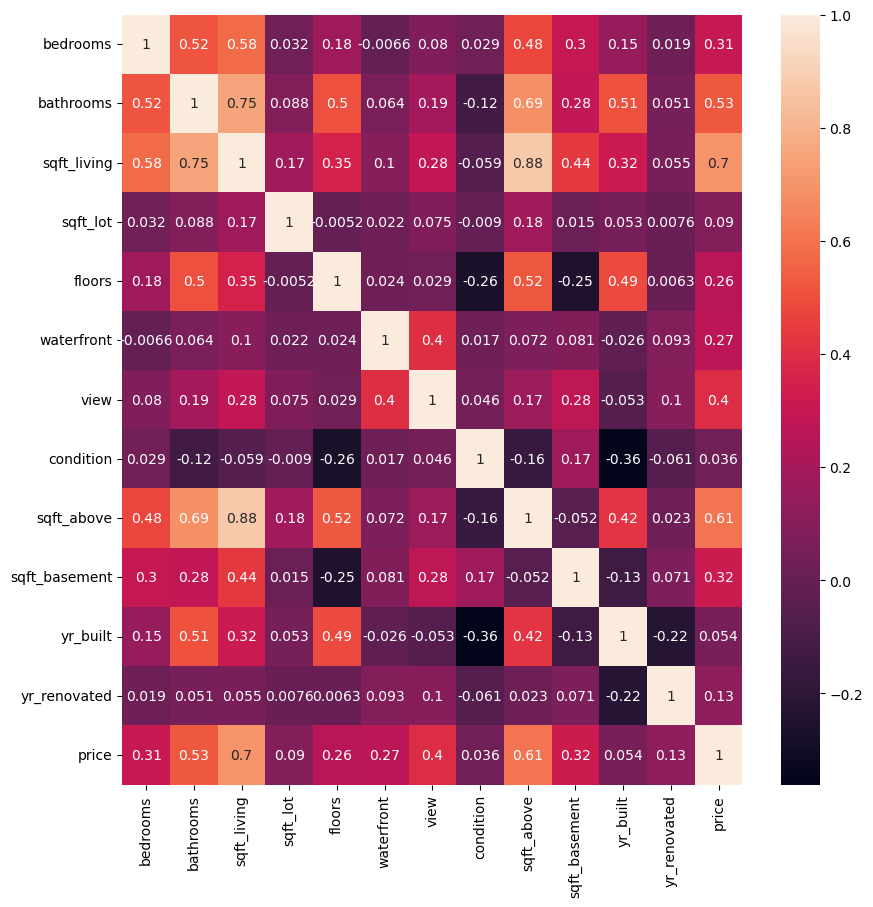

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(house_price_data.corr(), annot=True)
plt.show()

In [157]:
x = house_price_data.iloc[:,:-1]
y = house_price_data['price']


In [158]:
sc = StandardScaler()
sc.fit(x)
x_scaled = pd.DataFrame(sc.transform(x), columns=x.columns)
x_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128


In [159]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### **Linear Regression**

In [160]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100


59.88156528755446

In [161]:
y_prd = lr.predict(x_test)
print(mean_squared_error(y_true=y_test, y_pred=y_prd))
print(mean_absolute_error(y_true=y_test, y_pred=y_prd))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_prd)))

60721137799.81036
158388.17637459963
246416.5940025354


**Note :** We are not working on proper model or accuracy, we just want to compare between LinearRegression and Regularization methods

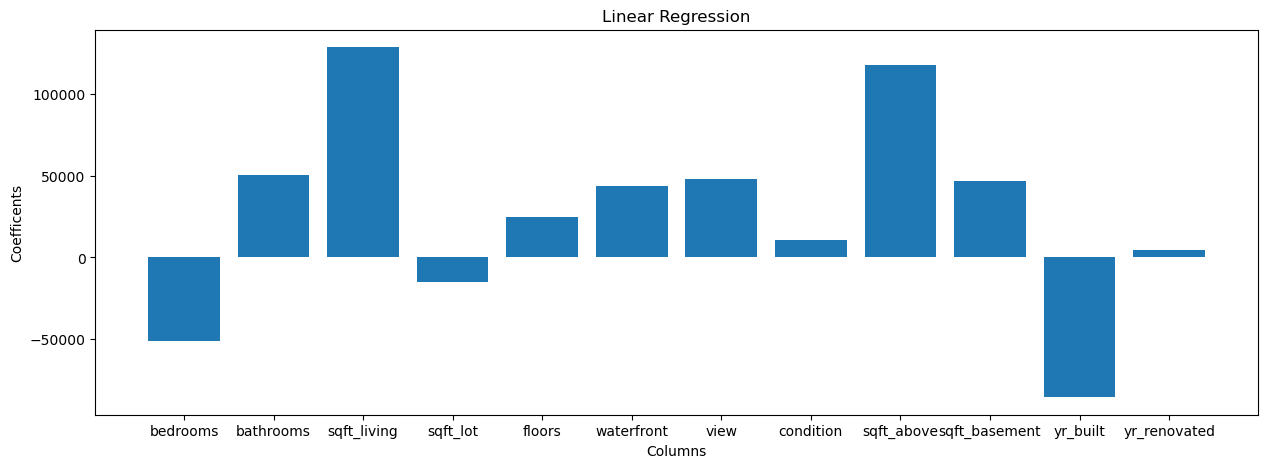

In [162]:
plt.figure(figsize=(15,5))
plt.bar(x_scaled.columns, lr.coef_)
plt.title('Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Coefficents')
plt.show()

### **Lasso(L1) Regularizarion**

In [163]:
l1 = Lasso(alpha=10)
l1.fit(x_train, y_train)
l1.score(x_test, y_test)*100

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.416e+12, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


59.88152378780316

In [164]:
y_prd = l1.predict(x_test)
print(mean_squared_error(y_true=y_test, y_pred=y_prd))
print(mean_absolute_error(y_true=y_test, y_pred=y_prd))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_prd)))

60721200611.6358
158386.67741424785
246416.72145298054


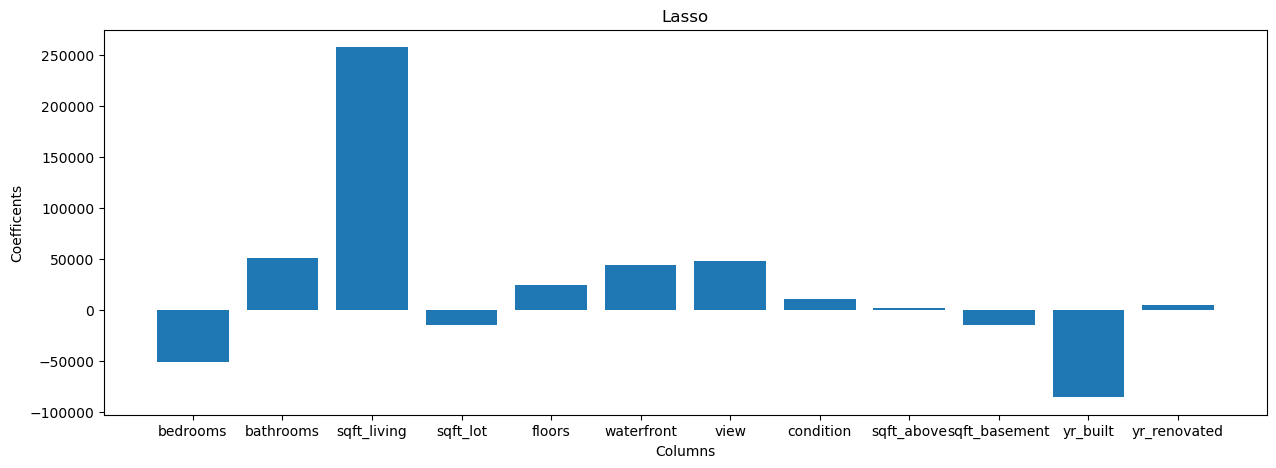

In [165]:
plt.figure(figsize=(15,5))
plt.bar(x_scaled.columns, l1.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('Coefficents')
plt.show()

**Note :** It reduces the coefficient values.

In [166]:
l2 = Ridge(alpha=10)
l2.fit(x_train, y_train)
l2.score(x_test, y_test)*100

59.88114511594994

In [167]:
y_prd = l2.predict(x_test)
print(mean_squared_error(y_true=y_test, y_pred=y_prd))
print(mean_absolute_error(y_true=y_test, y_pred=y_prd))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_prd)))

60721773749.29545
158375.6170030372
246417.88439416373


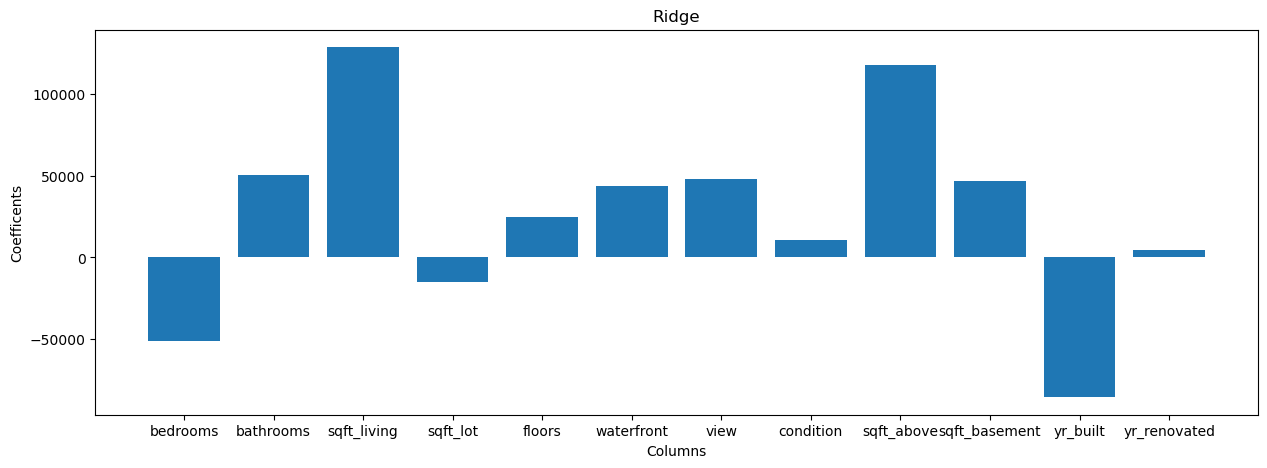

In [168]:
plt.figure(figsize=(15,5))
plt.bar(x_scaled.columns, l2.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('Coefficents')
plt.show()

In [169]:
compare_data = pd.DataFrame({'columns':x_scaled.columns, 'Linear Regression':lr.coef_, 'Lasso': l1.coef_, 'Ridge': l2.coef_})

compare_data

,columns,Linear Regression,Lasso,Ridge
0,bedrooms,-51447.926638,-51424.455929,-51329.982304
1,bathrooms,50512.034725,50478.148034,50493.394868
2,sqft_living,128882.644110,257499.669474,128793.063618
3,sqft_lot,-15241.313487,-15225.527673,-15206.797444
4,floors,24791.382737,24792.204631,24782.247615
5,waterfront,43721.675813,43715.755085,43706.130485
6,view,47888.513556,47884.892225,47907.005781
7,condition,10965.797570,10954.620051,10980.795427
8,sqft_above,117953.193117,1977.089937,117864.605115
9,sqft_basement,46760.694277,-15197.807367,46740.549756
